# Data Prep & Sliding Window 
For this notebook, we will take our **datastore.csv** file created with **notebooks 1&2** and we will further process & apply a *sliding window* approach to labeling our data. 

Given this data is on time-series nature, we must keep it's time-series integrity intact. 

To do so, we will slide a **15-day window** ploting that with **matplotlib** and saving that chart as an image. Given we have multiple indicators, we will take advantage of colors. 

```python
if open_price_20th_day > close_of_15th_by_2_percent:
    prediction = "buy" # buy on 15th, sell on 20th

if open_price_20th_day < close_of_15th_by_1_percent:
    prediction = "sell" # sell on 15th, buy on 20th 

else:
    prediction = "hold
```

## Following
We will implement and experiment with other labeling methods and strategies that are unique to trading execution algorithms

In [ ]:
# !pip install tqdm
# !pip install seaborn
# !pip install tifffile

In [1]:
from tqdm import tnrange
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tifffile import imsave
import tifffile

%matplotlib inline

In [4]:
# Loading csv
path = './data/post_processing/datastore.csv'
df = pd.read_csv(path, index_col='time')

In [6]:
df.head()

,open,close,SMA_5,SMA_10,SMA_20
time,,,,,
2009-06-23 21:00:00,1.63469,1.64550,1.642852,1.641587,1.634591
2009-06-24 21:00:00,1.64547,1.64074,1.644338,1.641218,1.634408
2009-06-25 21:00:00,1.64080,1.63684,1.641810,1.640518,1.633360
2009-06-26 21:00:00,1.63731,1.65245,1.642052,1.642559,1.634398
2009-06-27 21:00:00,1.65245,1.65245,1.645596,1.643680,1.636144


## Labeling & Creating Images 

In [98]:
# Plotting and image saving function
def save_image(df, path):
    """
    df: dataframe to create images
    path: the path to save the file
    """
    start_index = 0
    end_index = 15
    label_index = 20
    img_index = 1
    
    for i in tnrange(len(df), desc='Dataset %'):
        
        try:
            # grabbing our window
            window_df = df.iloc[start_index:end_index]

            # Grabbing last day
            day_15_close = window_df.iloc[-1]['close']

            # Calculating 2% increase
            two_percent_increase = day_15_close + (day_15_close * 0.02)

            # Calculating 1% decrease 
            one_percent_decrease = day_15_close - (day_15_close * 0.01)

            # plotting our graph
            plt.plot(window_df['close'])
            plt.plot(window_df['open'])
            plt.plot(window_df['SMA_5'])
            plt.plot(window_df['SMA_10'])
            plt.plot(window_df['SMA_20'])
            plt.axis('off')

            # Labelling
            if df.iloc[label_index]['open'] >= two_percent_increase:

                # Saving buy
                label = 'Buy'
                plt.savefig(f'{path}/{img_index}.{label}.png', dpi=100)
                plt.close()

                # Increase image index
                img_index += 1

            elif df.iloc[label_index]['open'] <= one_percent_decrease:

                # Sell
                label = 'Sell'
                plt.savefig(f'{path}/{img_index}.{label}.png', dpi=100)
                plt.close()

                # Increase index
                img_index += 1

            else:

                # hold
                label = 'Hold'
                plt.savefig(f'{path}/{img_index}.{label}.png', dpi=100)
                plt.close()

                # increase index
                img_index += 1

            # Counting up index
            start_index += 1
            end_index += 1
            label_index += 1       
            
        except Exception:
            pass
        
    # Finished!
    print('Finished!')

Finished!


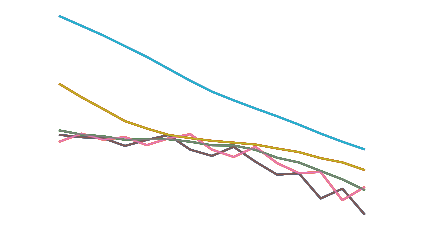

In [99]:
# Saving our images!
save_path = f'{os.curdir}/data/model_data/images_unscattered'
save_image(df, save_path)

In [88]:
# # Cleaning scattered - removing hold for scattered df
# """
# The purpose of this is to see if it can generalize better with buy/sell (binary)
# """
# path = f'{os.curdir}/data/model_data/images_scattered'

# for f in os.listdir(path):
#     if f.split('.')[1] == 'Hold':
#         os.remove(f'{path}/{f}')
#     else:
#         pass

## Labeling & Image Creation - Stationary Close

In [93]:
stationary_close = df['close'].diff()
df['Stationary_Close'] = stationary_close
df = df[1:]

In [96]:
# Plotting and image saving function
def save_image(df, path):
    """
    df: dataframe to create images
    path: the path to save the file
    """
    start_index = 0
    end_index = 28
    label_index = 29
    img_index = 1
    
    for i in tnrange(len(df), desc='Dataset %'):
        
        try:
            # grabbing our window
            window_df = df.iloc[start_index:end_index]

            # plotting our graph
            plt.plot(window_df['close'])
            plt.plot(window_df['open'])
            plt.plot(window_df['SMA_5'])
            plt.plot(window_df['SMA_10'])
            plt.plot(window_df['SMA_20'])
            plt.axis('off')

            # Labelling
            if df.iloc[label_index]['Stationary_Close'] > 0:

                # Saving buy
                label = 'Buy'
                plt.savefig(f'{path}/{img_index}.{label}.png', dpi=100)
                plt.close()

                # Increase image index
                img_index += 1

            else:

                # Sell
                label = 'Sell'
                plt.savefig(f'{path}/{img_index}.{label}.png', dpi=100)
                plt.close()

                # increase index
                img_index += 1

            # Counting up index
            start_index += 1
            end_index += 1
            label_index += 1       
            
        except Exception:
            pass
        
    # Finished!
    print('Finished!')

Finished!


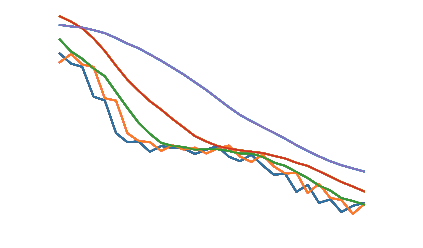

In [97]:
# Saving our images!
save_path = f'{os.curdir}/data/model_data/images'
save_image(df, save_path)

## Labeling CSV
Now we will create CSV's that correspond with the image dataset

In [134]:
# The original dataset
path = './data/model_data/images_unscattered'

unscattered_files = os.listdir(path)

for f in unscattered_files:
    if f == '.ipynb_checkpoints':
        unscattered_files.remove(f)
    else:
        pass
    
unscattered_df = pd.DataFrame(unscattered_files, columns=['image_name'])
unscattered_df['label'] = [i.split('.')[1] for i in unscattered_df['image_name']]
unscattered_df['image_name'] = [i.split('.')[0] + '.' + i.split('.')[1] for i in unscattered_df['image_name']]
unscattered_df['idx'] = [int(i.split('.')[0]) for i in unscattered_df['image_name']]
unscattered_df.set_index('idx', inplace=True)
unscattered_df.sort_index(ascending=True, inplace=True)

save_path = './data/model_data/'
unscattered_df.to_csv(f'{save_path}/unscattered.csv', index=False)

In [135]:
# The Scattered Dataset
path = './data/model_data/images_scattered'

scattered_files = os.listdir(path)

for f in scattered_files:
    if f == '.ipynb_checkpoints':
        scattered_files.remove(f)
    else:
        pass
    
scattered_df = pd.DataFrame(scattered_files, columns=['image_name'])
scattered_df['label'] = [i.split('.')[1] for i in scattered_df['image_name']]
scattered_df['image_name'] = [i.split('.')[0] + '.' + i.split('.')[1] for i in scattered_df['image_name']]
scattered_df['idx'] = [int(i.split('.')[0]) for i in scattered_df['image_name']]
scattered_df.set_index('idx', inplace=True)
scattered_df.sort_index(ascending=True, inplace=True)

save_path = './data/model_data/'
scattered_df.to_csv(f'{save_path}/scattered.csv', index=False)

In [136]:
# The Images - Stationary Close
path = './data/model_data/images_stationary'

stationary_files = os.listdir(path)

for f in stationary_files:
    if f == '.ipynb_checkpoints':
        stationary_files.remove(f)
    else:
        pass
    
stationary_df = pd.DataFrame(stationary_files, columns=['image_name'])
stationary_df['label'] = [i.split('.')[1] for i in stationary_df['image_name']]
stationary_df['image_name'] = [i.split('.')[0] + '.' + i.split('.')[1] for i in stationary_df['image_name']]
stationary_df['idx'] = [int(i.split('.')[0]) for i in stationary_df['image_name']]
stationary_df.set_index('idx', inplace=True)
stationary_df.sort_index(ascending=True, inplace=True)

save_path = './data/model_data/'
stationary_df.to_csv(f'{save_path}/stationary.csv', index=False)